# Tutorial
This is a tutorial for using the Geomagnetic Field Inversions code written by Frenk Out, Lix van Grinsven, Monika Korte, and Lennart de Groot. This tutorial will guide you through the following process:
1. Loading and Fitting data
2. FieldInversion
    1. Initiating a FieldInversion class and add data
    2. Run a time-dependent standard iterative inversion
    3. Plotting results
3. Sweeping through models to find optimal damping parameters (optional)
4. Run an inversion at one time (optional)

### 0. Loading libraries
This tutorial requires, besides geomagnetic_field_inversions, numpy, pandas, pathlib, matplotlib, and cartopy. The geomagnetic_field_inversions code consists of three files:
1. StationData is a class that prepares geomagnetic field data to be inputted in FieldInversion later.
2. FieldInversion is the main class where all calculations happen.
3. plot_tools is a plotting module that helps to create frequently used plots in a easy way.

In [12]:
# %load_ext autoreload
# %autoreload 2

import numpy as np
# Necessary for loading excel or csv files
import pandas as pd
# Necessary for correct path handling
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib as mpl
# Cartopy is only required for plotting world maps
import cartopy.crs as ccrs

# TODO: change these three import statements to comply with new location code
from geomagnetic_field_inversions import plot_tools
from geomagnetic_field_inversions import StationData
from geomagnetic_field_inversions import FieldInversion

## 1. Loading and Fitting data
#### Set-up
We will now proceed to loading and fitting the data. This is required to run the inversion later. The basic input for adding and fitting the data is latitude and longitude of each location where data has been sampled. After the class is initiated, data can be added. This data can be inclination, declination, or intensity data, but also X, Y, Z, or H magnetic data.

In [2]:
# Set a path to load and save files
# path should be like: .../geomagnetic_field_inversions/doc
path = Path().absolute()
# location of our 'mock' dataset
excel = pd.ExcelFile(path / 'first run_reversetime.xlsx')
# the latitude and longitude of out 6 stations in degrees
lat = [0.1, 35.0, 8.0, 35.9, 5.0, 60.7]
lon = [336.7, 140.0, 121.0, 243.0, 73.0, 336.6]

#### *StationData and add_data*
Now that we have set the groundwork, we can proceed to adding and fitting the individual datasets. All data belonging to the same location can be added to the same class. First you initiate a class for the station with its latitude and longitude. After that, you can add the data separately (from the spreadsheet) and finally fit a line through it.
The options for datatypes are:
- ['x', 'y', 'z', 'hor', 'inc', 'dec', 'int']

/home/out/anaconda3/envs/fieldmodel/lib/python3.8/site-packages/geomagnetic_field_inversions/data_prep.py:89: UserWarning: Decl. falls outside (-180, 180) range
  warnings.warn('Decl. falls outside (-180, 180) range')


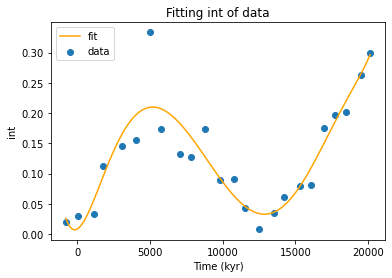

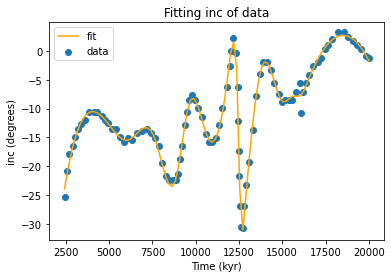

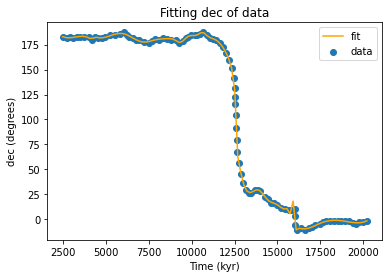

In [6]:
# Start by initializing a new class using latitude and longitude of the station
oda_2000 = StationData(lat[2], lon[2])
# The arguments of add_data are: type of data, the data (Nx2) containing data and time, and the unit of time
# we use pandas to convert our data into a long list and add the corresponding columns to the class
# we inputted time as kiloyears, so our timefactor is 1000
# optionally you can also add individual errors of measurements
# if no errors are inputted, declination and inclination errors are set to 1 degree;
# the other datatypes will be set an error of 1 $\mu$T
oda_2000.add_data('int', (pd.read_excel(excel, 'Oda_2000').iloc[:, [4, 5]].dropna().T.values.tolist()), 1000)
oda_2000.add_data('inc', (pd.read_excel(excel, 'Oda_2000').iloc[:, [0, 1]].dropna().T.values.tolist()), 1000)
oda_2000.add_data('dec', (pd.read_excel(excel, 'Oda_2000').iloc[:, [2, 3]].dropna().T.values.tolist()), 1000)
# the fitting method fits a line through the data points
# with the order parameter you can decide to which order your polynomial or Univariate Spline is allowed to go
# The smoothing parameter only takes effect if the Univariate Spline is used
# the method parameter specifies whether you want to fit data with a polynomial (polyfit) or a UnivariateSpline (USpline)
# If you want to see output of your fitting, you have to specify the optional parameter: output="YOUR_PATH_NAME"
# If nopthing is inputted, the function will default to fitting a 10th order polynome
oda_2000.fitting(order=[8, 3, 3], smoothing=[None, 50, 100], method=['polyfit', 'USpline', 'USpline'], output=path)

In [5]:
# Now we fit the rest, but do not show output
valet_1989 = StationData(lat[0], lon[0])
valet_1989.add_data('int', (pd.read_excel(excel, 'Valet_1989').iloc[:, [4, 5]].dropna().T.values.tolist()), 1000)
valet_1989.add_data('inc', (pd.read_excel(excel, 'Valet_1989').iloc[:, [0, 1]].dropna().T.values.tolist()), 1000)
valet_1989.add_data('dec', (pd.read_excel(excel, 'Valet_1989').iloc[:, [2, 3]].dropna().T.values.tolist()), 1000)
valet_1989.fitting()

haneda_2020 = StationData(lat[1], lon[1])
haneda_2020.add_data('int', (pd.read_excel(excel, 'Haneda_2020').iloc[:, [4, 5]].dropna().T.values.tolist()), 1000)
haneda_2020.add_data('inc', (pd.read_excel(excel, 'Haneda_2020').iloc[:, [0, 1]].dropna().T.values.tolist()), 1000)
haneda_2020.add_data('dec', (pd.read_excel(excel, 'Haneda_2020').iloc[:, [2, 3]].dropna().T.values.tolist()), 1000)
haneda_2020.fitting()

valet_1988 = StationData(lat[3], lon[3])
valet_1988.add_data('int', (pd.read_excel(excel, 'Valet_1988').iloc[:, [4, 5]].dropna().T.values.tolist()), 1000)
valet_1988.add_data('inc', (pd.read_excel(excel, 'Valet_1988').iloc[:, [0, 1]].dropna().T.values.tolist()), 1000)
valet_1988.add_data('dec', (pd.read_excel(excel, 'Valet_1988').iloc[:, [2, 3]].dropna().T.values.tolist()), 1000)
valet_1988.fitting(order=[3, 14, 10], smoothing=[0.02, None, None], method=['USpline', 'polyfit', 'polyfit'])

valet_2014 = StationData(lat[4], lon[4])
valet_2014.add_data('int', (pd.read_excel(excel, 'Valet_2014').iloc[:, [4, 5]].dropna().T.values.tolist()), 1000)
valet_2014.add_data('inc', (pd.read_excel(excel, 'Valet_2014').iloc[:, [0, 1]].dropna().T.values.tolist()), 1000)
valet_2014.add_data('dec', (pd.read_excel(excel, 'Valet_2014').iloc[:, [2, 3]].dropna().T.values.tolist()), 1000)
valet_2014.fitting(order=[8, 8, 5])

channell_2000 = StationData(lat[5], lon[5])
channell_2000.add_data('int', (pd.read_excel(excel, 'Channell_2000').iloc[:, [4, 5]].dropna().T.values.tolist()), 1000)
channell_2000.add_data('inc', (pd.read_excel(excel, 'Channell_2000').iloc[:, [0, 1]].dropna().T.values.tolist()), 1000)
channell_2000.add_data('dec', (pd.read_excel(excel, 'Channell_2000').iloc[:, [2, 3]].dropna().T.values.tolist()), 1000)
channell_2000.fitting(order=[15, 10, 10])

/home/out/anaconda3/envs/fieldmodel/lib/python3.8/site-packages/geomagnetic_field_inversions/data_prep.py:89: UserWarning: Decl. falls outside (-180, 180) range
  warnings.warn('Decl. falls outside (-180, 180) range')
/home/out/anaconda3/envs/fieldmodel/lib/python3.8/site-packages/geomagnetic_field_inversions/data_prep.py:89: UserWarning: Decl. falls outside (-180, 180) range
  warnings.warn('Decl. falls outside (-180, 180) range')
/home/out/anaconda3/envs/fieldmodel/lib/python3.8/site-packages/geomagnetic_field_inversions/data_prep.py:89: UserWarning: Decl. falls outside (-180, 180) range
  warnings.warn('Decl. falls outside (-180, 180) range')
/home/out/anaconda3/envs/fieldmodel/lib/python3.8/site-packages/geomagnetic_field_inversions/data_prep.py:89: UserWarning: Decl. falls outside (-180, 180) range
  warnings.warn('Decl. falls outside (-180, 180) range')


## 2. FieldInversion
### 2. Initiate a FieldInversion class and add data
#### *FieldInversion*
You can start a FieldInversion class by calling **FieldInversion** and inputting the following parameters:
- time_array: the timesteps over which you want to invert
- maxdegree: maximum order for spherical harmonics model (defaults to order 3 &rarr; 15 gaussian coefficients)
- spl_order: the order of Bsplines you want to use (defaults to 3 &rarr; cubic BSpline)
- r_model: the distance from Earth's centre where you want to model the magnetic field (defaults to Earth's surface &rarr; 6371.2 km)
- r_earth: radius of the Earth (defaults to 6371.2 km)
- cmb_earth: location of core-mantle boundary, measured as distance from Earth's centre (defaults to 3485.0 km)
- geodetic: boolean indicating if inputted station coordinates and magnetic measurements are given in a geodetic frame, True, or geocentric frame, False (defaults to True)
- verbose: verbosity flag (defaults to False)

In our example we only specify the required time_array and we set verbose to True to see what the class is doing.

#### *add_data*
Then we add out prefitted data to the FieldInversion class by simply calling the add_data method and adding the fitted classes from the previous step. Optionally you can:
1. request a different fitting algorithm for the error
2. you can forcefully add data if it does not match the complete time_array
>but we urge you not to use these 2 optional parameters, since they are not fully tested

In [7]:
# input modeled time array; from 3000 to 17000 with steps of 1000 yr
test_inv = FieldInversion(time_array = np.linspace(3000, 17000, 15), verbose=True)
test_inv.add_data(valet_1989)
test_inv.add_data(haneda_2020)
test_inv.add_data(oda_2000)
test_inv.add_data(valet_1988)
test_inv.add_data(valet_2014)
test_inv.add_data(channell_2000)

Adding int-type
Adding inc-type
Adding dec-type
Coordinates are geodetic, translating to geocentric coordinates.
Data is added to class
Adding int-type
Adding inc-type
Adding dec-type
Coordinates are geodetic, translating to geocentric coordinates.
Data is added to class
Adding int-type
Adding inc-type
Adding dec-type
Coordinates are geodetic, translating to geocentric coordinates.
Data is added to class
Adding int-type
Adding inc-type
Adding dec-type
Coordinates are geodetic, translating to geocentric coordinates.
Data is added to class
Adding int-type
Adding inc-type
Adding dec-type
Coordinates are geodetic, translating to geocentric coordinates.
Data is added to class
Adding int-type
Adding inc-type
Adding dec-type
Coordinates are geodetic, translating to geocentric coordinates.
Data is added to class


### B. Run a time-dependent standard iterative inversion
After we have set up the class, we can proceed to the geomagnetic field inversion.
#### *prepare_inversion*
First we have to prepare all matrices before execution. For that purpose we need two parameters:
- spatial_df: the spatial damping factor
- temporal_df: the temporal damping factor

We set for illustrative purposes these damping factors to 3e-10 and 1e-2 respectively. Normally you would have to investigate which combination of damping parameters is best (see section 3).

In [16]:
test_inv.prepare_inversion(spatial_df = 3e-10, temporal_df = 1e-2)

#### *run_inversion*
After preparing all matrices, we proceed to starting the iterative inversion.

In [12]:
x0 = np.zeros(test_inv._nm_total)
x0[0] = -30000
test_inv.run_inversion(x0, max_iter=30, int_mult=1e4)

Start iteration 1
Residual is 233.09
Start iteration 2
Residual is 73.20
Start iteration 3
Residual is 50.39
Start iteration 4
Residual is 45.60
Start iteration 5
Residual is 42.51
Start iteration 6
Residual is 40.56
Start iteration 7
Residual is 43.92
Start iteration 8
Residual is 44.36
Start iteration 9
Residual is 42.21
Start iteration 10
Residual is 48.32
Start iteration 11
Residual is 45.13
Start iteration 12
Residual is 43.44
Start iteration 13
Residual is 49.49
Start iteration 14
Residual is 48.41
Start iteration 15
Residual is 50.03
Start iteration 16
Residual is 49.41
Start iteration 17
Residual is 49.79
Start iteration 18
Residual is 46.84
Start iteration 19
Residual is 45.88
Start iteration 20
Residual is 52.89
Start iteration 21
Residual is 46.23
Start iteration 22
Residual is 45.58
Start iteration 23
Residual is 54.88
Start iteration 24
Residual is 46.06
Start iteration 25
Residual is 40.12
Start iteration 26
Residual is 41.15
Start iteration 27
Residual is 51.00
Start ite

In [44]:
test_inv.save_spherical_coefficients(path / 'output', save_residual=True)

### C. Plotting Results

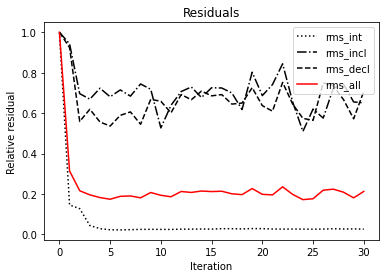

In [13]:
fig, ax = plt.subplots()
ax.set_title('Residuals')
ax.set_xlabel('Iteration')
ax.set_ylabel('Relative residual')
ax = gfi.plot_tools.plot_residuals(ax, test_inv)
ax.legend(loc='upper right')
plt.show()

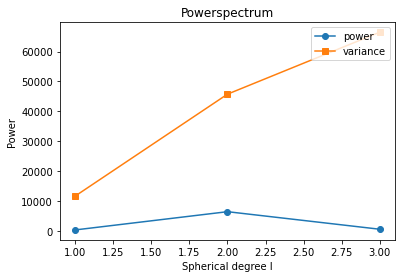

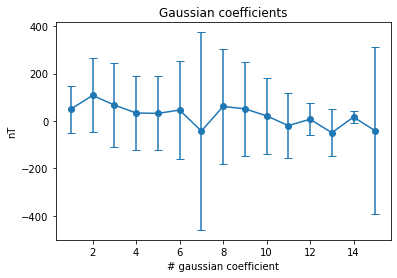

In [14]:
fig, ax = plt.subplots()
ax.set_title('Powerspectrum')
ax.set_xlabel('Spherical degree l')
ax.set_ylabel('Power')
ax = gfi.plot_tools.plot_powerspectrum(ax, test_inv)
ax.legend(loc='upper right')
plt.show()

fig, ax = plt.subplots()
ax.set_title('Gaussian coefficients')
ax.set_xlabel('# gaussian coefficient')
ax.set_ylabel('nT')
ax = gfi.plot_tools.plot_powerspectrum(ax, test_inv, power=False, plot_time=np.arange(10))
plt.show()

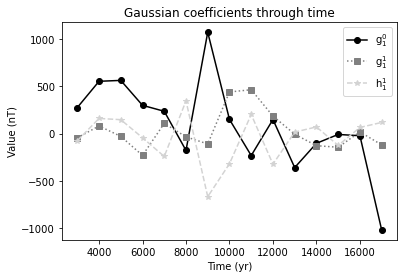

In [15]:
fig, ax = plt.subplots()
ax.set_title('Gaussian coefficients through time')
ax.set_xlabel('Time (yr)')
ax.set_ylabel('Value (nT)')
ax = gfi.plot_tools.plot_gaussian(ax, test_inv, plot_degree=1)
ax.legend(loc='upper right')
plt.show()

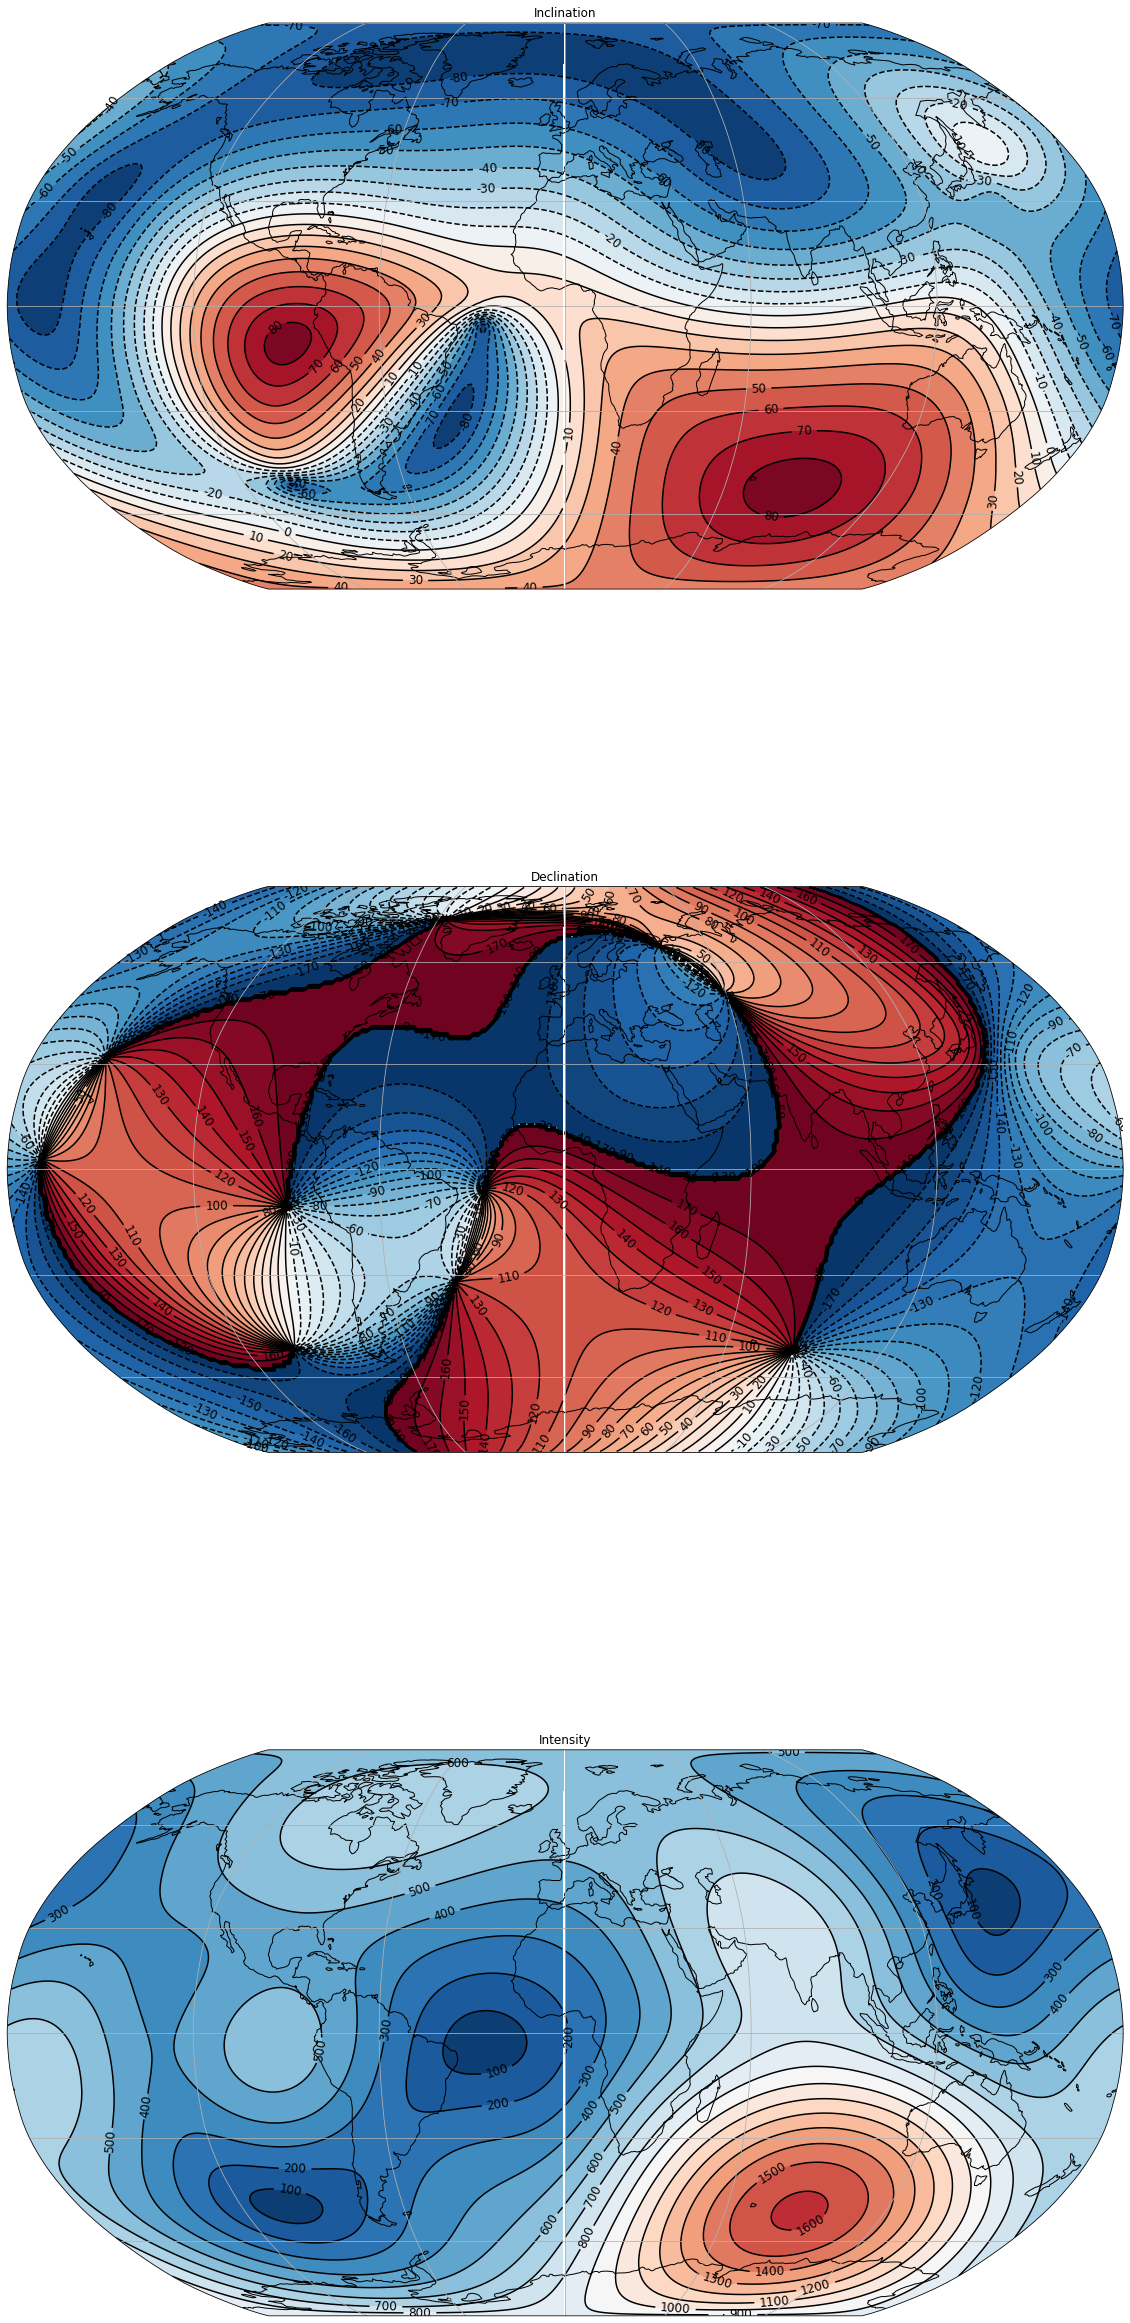

In [22]:
fig, axes = plt.subplots(nrows=3, figsize=(20, 45), subplot_kw={'projection': ccrs.Robinson()})
plot_kw = {'level_int': np.arange(0, 2000, 100), 'levelf_int': np.arange(0, 2000, 100)}
axes = gfi.plot_tools.plot_world(axes, test_inv, projection=ccrs.PlateCarree(), plot_time=0, plot_kw=plot_kw)
plt.show()

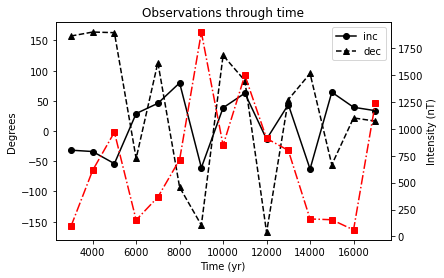

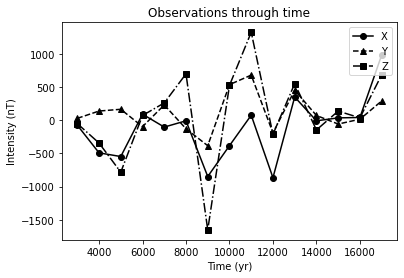

In [35]:
# one place through time
fig, ax = plt.subplots()
ax.set_title('Observations through time')
ax.set_xlabel('Time (yr)')
ax.set_ylabel('Degrees')
ax, ax2 = gfi.plot_tools.plot_place(ax, test_inv, [35.0, 140.0])
ax2.set_ylabel('Intensity (nT)')
ax.legend(loc='upper right')
ax.set_ylim(-180, 180)
plt.show()

fig, ax = plt.subplots()
ax.set_title('Observations through time')
ax.set_xlabel('Time (yr)')
ax.set_ylabel('Intensity (nT)')
ax = gfi.plot_tools.plot_place(ax, test_inv, [35.0, 140.0], incdecint=False)
ax.legend(loc='upper right')
plt.show()

## 3. Sweeping through models to find optimal damping parameters
With the data added to the class, we can finally proceed to the modelling part. The first challenge is to find the damping parameters that best suit this problem. To find them, we have to sweep to various models and plot residuals versus model norm.

#### *sweep_damping*
We need to input:
- spatial_range: the range of spatial damping parameters to be tested
- temporal_range: the range of temporal damping parameters to be tested
- x0: start model of gaussian coefficients

Result can be saved to a folder with the optional dictionary save_kwargs

In [14]:
spatial_range = np.logspace(-12, -8, 5)
temporal_range = np.logspace(0, 10, 5)
x0 = np.zeros(test_inv._nm_total)
x0[0] = -30000

test_inv.verbose = False
test_inv.sweep_damping(x0, spatial_range, temporal_range, save_kwargs={'basedir': path / 'output', 'save_residual': True})

100%|█████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:12<00:00,  2.58s/it]


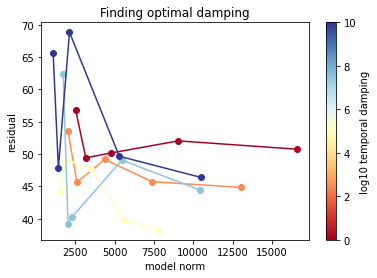

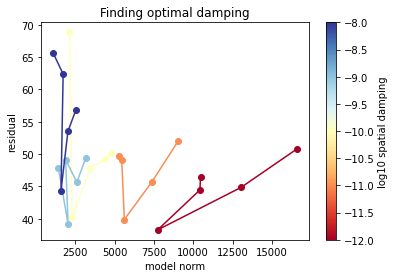

In [15]:
# Now we plot residual vs norm of the model
fig, ax = plt.subplots()
ax.set_title('Finding optimal damping')
ax.set_xlabel('model norm')
ax.set_ylabel('residual')
ax = plot_tools.plot_sweep(ax, spatial_range, temporal_range, plot_spatial=True,
                           basedir=path / 'output')
norm = mpl.colors.Normalize(vmin=np.log10(temporal_range[0]), vmax=np.log10(temporal_range[-1]))
sm = plt.cm.ScalarMappable(cmap='RdYlBu', norm=norm)
plt.colorbar(sm, label='log10 temporal damping')
plt.show()

fig, ax = plt.subplots()
ax.set_title('Finding optimal damping')
ax.set_xlabel('model norm')
ax.set_ylabel('residual')
ax = plot_tools.plot_sweep(ax, spatial_range, temporal_range, plot_spatial=False,
                           basedir=path / 'output')
norm = mpl.colors.Normalize(vmin=np.log10(spatial_range[0]), vmax=np.log10(spatial_range[-1]))
sm = plt.cm.ScalarMappable(cmap='RdYlBu', norm=norm)
plt.colorbar(sm, label='log10 spatial damping')
plt.show()

A spatial damping factor of 1e-9 seems to be best; it results in both a low residual and small gaussian coefficients. For the temporal damping factor, it is slightly harder to judge. For now we will assume a temporal damping factor of 1e6.

## 4. Run an inversion at one time
The code does also work for one timestep

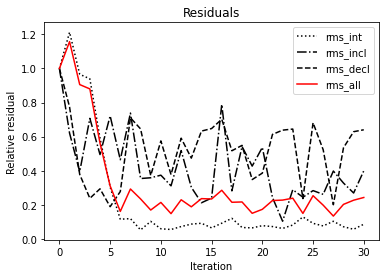

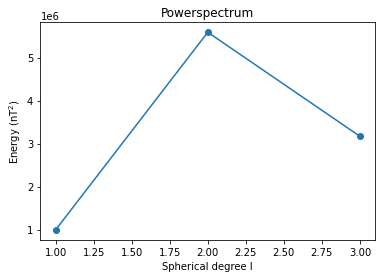

In [106]:
test_inv = FieldInversion(time_array = [6000])
test_inv.add_data(valet_1989)
test_inv.add_data(haneda_2020)
test_inv.add_data(oda_2000)
test_inv.add_data(valet_1988)
test_inv.add_data(valet_2014)
test_inv.add_data(channell_2000)
test_inv.prepare_inversion(spatial_df = 1e-10, temporal_df = 0)
x0 = np.zeros(test_inv._nm_total)
x0[0] = -30000
test_inv.run_inversion_notime(x0, max_iter=30, int_mult=1e4)
test_inv.save_spherical_coefficients(path / 'output', save_residual=True)

fig, ax = plt.subplots()
ax.set_title('Residuals')
ax.set_xlabel('Iteration')
ax.set_ylabel('Relative residual')
ax = gfi.plot_tools.plot_residuals(ax, test_inv)
ax.legend(loc='upper right')
plt.show()

fig, ax = plt.subplots()
ax.set_title('Powerspectrum')
ax.set_xlabel('Spherical degree l')
ax.set_ylabel('Energy (nT$^2$)')
ax = gfi.plot_tools.plot_powerspectrum(ax, test_inv)
plt.show()